# Explore here
Paso 1: Carga del conjunto de datos


In [21]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

# Your code here
import pandas as pd

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")
total_data.head(200)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
195,5,158,84,41,210,39.4,0.395,29,1
196,1,105,58,0,0,24.3,0.187,21,0
197,3,107,62,13,48,22.9,0.678,23,1
198,4,109,64,44,99,34.8,0.905,26,1


## Paso 2: Realiza un EDA completo

In [22]:
#===============================================================================
#                Estudio Unidimensional
#===============================================================================


# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

#descripcion
total_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
total_data.shape

(768, 9)

In [24]:
Col_Con_Ceros = total_data.describe().loc['min'] == 0
Total_Ceros = Col_Con_Ceros[Col_Con_Ceros].index.tolist()
print("Columnas con mínimo igual a 0:", Total_Ceros)
print("Valores cero antes de la imputación:\n", (total_data[Total_Ceros] == 0).sum())

Columnas con mínimo igual a 0: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']
Valores cero antes de la imputación:
 Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [25]:
# Calcular el porcentaje de ceros en cada columna
Total_Ceros = (total_data[Total_Ceros] == 0).sum() / len(total_data) * 100
print("Porcentaje de valores cero por columna:\n", Total_Ceros)

Porcentaje de valores cero por columna:
 Pregnancies      14.453125
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
Outcome          65.104167
dtype: float64


In [50]:
total_data.shape

(392, 9)

In [26]:

#===============================================================================
#                Missing Data Ceros, N/A
#===============================================================================
# Count NaN
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Como primera Conclusion obtenida del describese observa que Hay datos de min = 0 En Campos que no tienen Sentido: Presion arterial (BloodPressure), Indice de MAsa Corporea (BMI), Glucosa, Grosor de la piel (SkinThickness)



Lo siguiente que vemos es que no hay datos Null.

In [27]:
total_data.drop(total_data[total_data['BMI'] == 0].index, inplace=True)
total_data.drop(total_data[total_data['BloodPressure'] == 0].index, inplace=True)
total_data.drop(total_data[total_data['Glucose'] == 0].index, inplace=True)
total_data.drop(total_data[total_data['SkinThickness'] == 0].index, inplace=True)
total_data.drop(total_data[total_data['Insulin'] == 0].index, inplace=True)

In [28]:
Col_Con_Ceros = total_data.describe().loc['min'] == 0
Total_Ceros = Col_Con_Ceros[Col_Con_Ceros].index.tolist()
print("Columnas con mínimo igual a 0:", Total_Ceros)
print("Valores cero antes de la imputación:\n", (total_data[Total_Ceros] == 0).sum())

Columnas con mínimo igual a 0: ['Pregnancies', 'Outcome']
Valores cero antes de la imputación:
 Pregnancies     56
Outcome        262
dtype: int64


In [29]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [30]:
total_data.shape

(392, 9)

Los Datos se redujeros de 768 Registros a  392 Registros

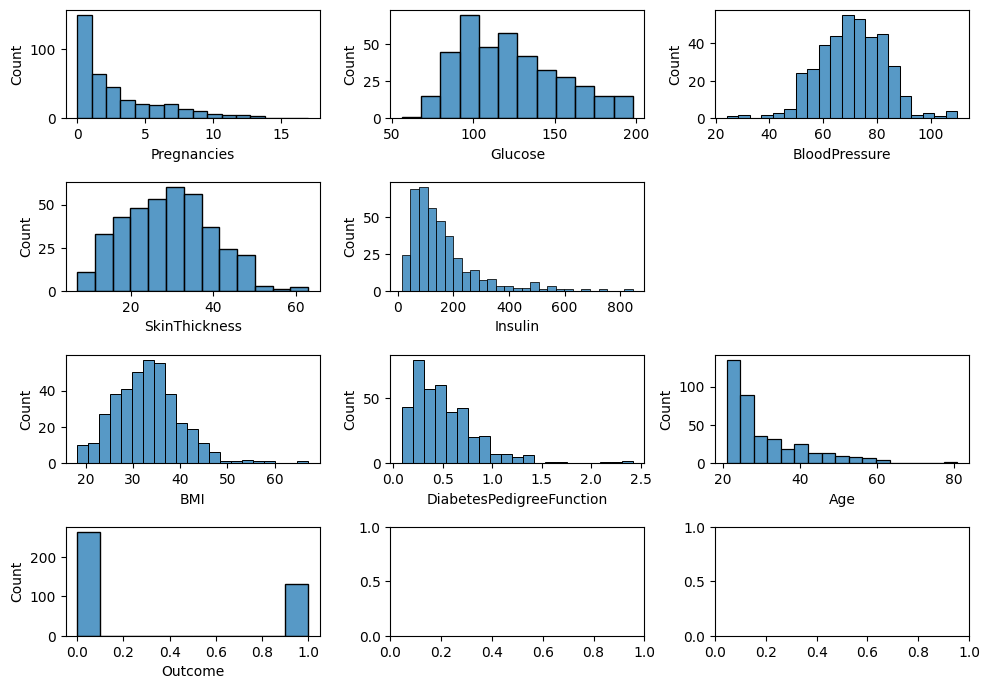

In [31]:
#===============================================================================
#        Esta Grafica me permite ver a donde se mueven los Datos
#                       Datos Categórico
#===============================================================================
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0,1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0,2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[1,0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[1,1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2,0], data = total_data, x = "BMI")
sns.histplot(ax = axis[2,1], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2,2], data = total_data, x = "Age")
sns.histplot(ax = axis[3,0], data = total_data, x = "Outcome")


fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

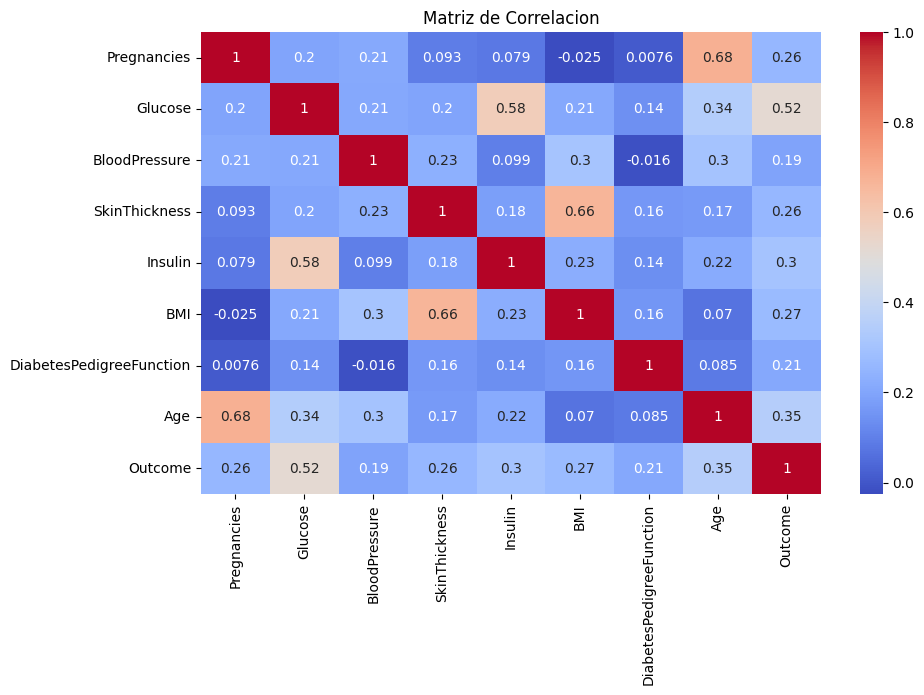

In [32]:
#******************************************************************************************************
#              Voy A Colocar El Analiziz MultiVariable A PArtir de Aqui
#******************************************************************************************************
#Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm')# sirve para ver la correlacion entre variables.
plt.title("Matriz de Correlacion")
plt.show()


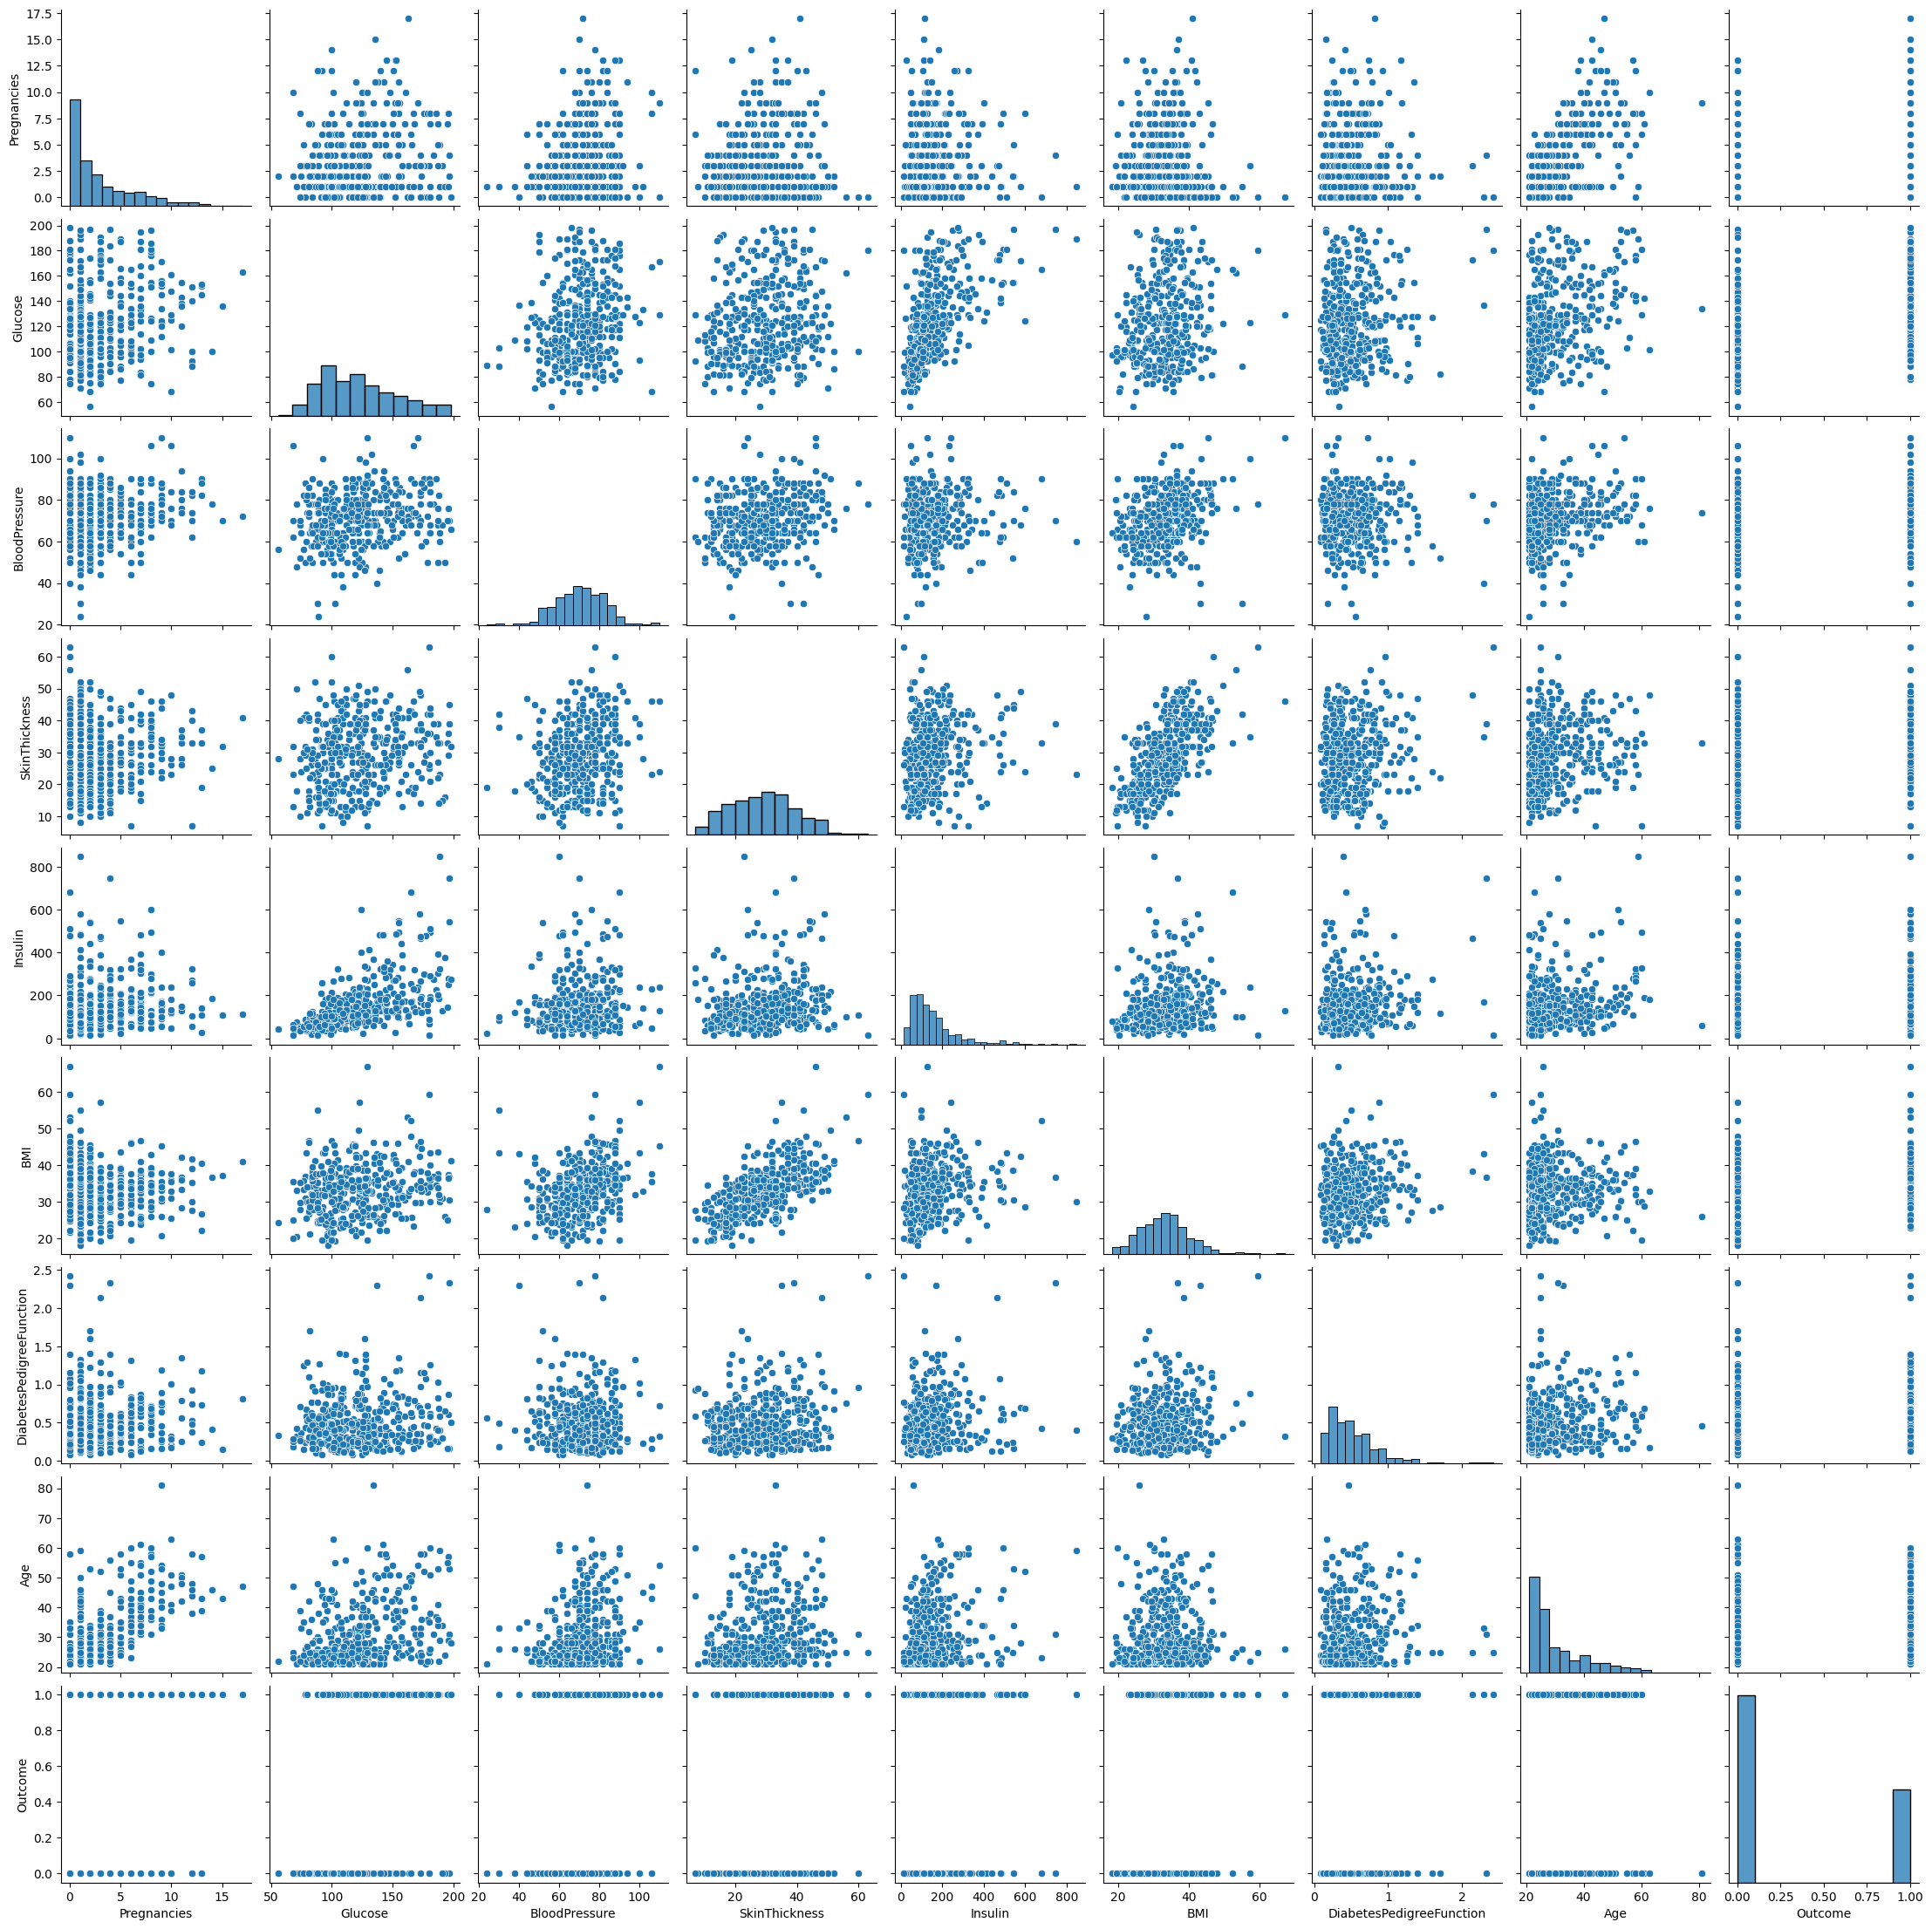

In [33]:
#===============================================================================
#                      Graficos Multiples
#===============================================================================
sns.pairplot(data = total_data)

In [34]:
total_data.shape

(392, 9)

## Paso 3: Construye un modelo de árbol de decisión

In [ ]:
def Precision_Omega(y_test_o, y_pred_o):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    # comprobaciones del modelo.
    print(f"Accuracy: {accuracy_score(y_test_o, y_pred_o):.4f}") # Precisión general del modelo
    print(f"Precision: {precision_score(y_test_o, y_pred_o):.4f}") # Mide la proporción de positivos reales entre los predichos como positivos
    print(f"Recall: {recall_score(y_test_o, y_pred_o):.4f}") # Evalúa qué porcentaje de casos positivos fueron correctamente identificados
    print(f"F1 Score: {f1_score(y_test_o, y_pred_o):.4f}") # Combina precisión y recall para una evaluación equilibrada


def Matriz_Confusion(y_test_o, y_pred_o):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()




In [35]:
#===============================================================================
#                      Mi Script Para El Split
#===============================================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear el escalador
X = total_data.drop(columns=["Outcome"])
y = total_data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



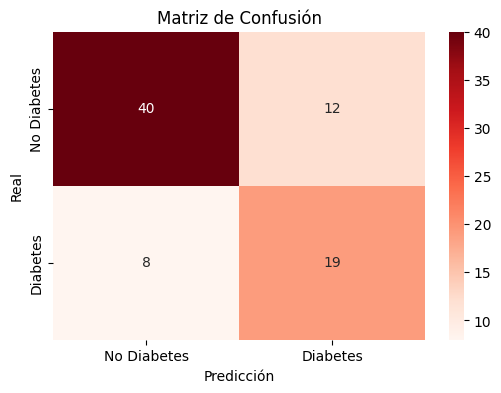

In [41]:

Matriz_Confusion(y_test, y_pred)

# Pruebas Con un Segundo Modelo

## Paso 4: Optimiza el modelo anterior

## Prueba Adicional

## Paso 5: Guarda el modelo